<a href="https://colab.research.google.com/github/shinjuno123/snackDetection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Preprocessing

In [ ]:
import cv2
import glob
import os
import numpy as np

path = 'drive/MyDrive/snack_project/preprocessed_images'
all_files = glob.glob(path + "/*")
image_extension = 'jpg'

# extract only images
image_names = [file for file in all_files if file.split('.')[1] == image_extension]
image_names.sort(key=lambda x:int(x.split('/')[4].replace('.'+image_extension,'')))


# extract only classes
classes = []
class_file = open(path + "/classes.txt")
for line in class_file:
    classes.append(line.replace('\n',''))

# extract image's claass and bounding box
bbox = []
class_ = []
image_train = []
img_idx = 0
image_metadata_files = [file for file in all_files if file.split('.')[1] == 'txt' and file.find('classes') == -1]
image_metadata_files.sort(key=lambda x:int(x.split('/')[4].replace('.txt','')))
for metadata_file in image_metadata_files:
    meta_data = open(metadata_file)
    print(metadata_file)
    for line in meta_data:
        image_train.append(cv2.imread(metadata_file.replace('.txt','.jpg'),cv2.IMREAD_COLOR)/255.0)
        line_array = line.split()
        bbox.append(list(np.float_(line_array[1:])))
        one_hot_encoding = [0,0,0,0,0]
        one_hot_encoding[int(line_array[0])] = 1
        class_.append(one_hot_encoding)
    img_idx += 1


np_bbox =  np.array(bbox,dtype=float)
np_class_ = np.array(class_,dtype=float)
np_images = np.array(image_train,dtype=float)
print(np_bbox.shape)
print(np_class_.shape)
print(np_images.shape)
np.save('drive/MyDrive/snack_project/images'+".npy",np_images)
np.save('drive/MyDrive/snack_project/bbox'+".npy",np_bbox)
np.save('drive/MyDrive/snack_project/class'+".npy",np_class_)



drive/MyDrive/snack_project/preprocessed_images/1.txt
drive/MyDrive/snack_project/preprocessed_images/2.txt
drive/MyDrive/snack_project/preprocessed_images/3.txt
drive/MyDrive/snack_project/preprocessed_images/4.txt
drive/MyDrive/snack_project/preprocessed_images/5.txt
drive/MyDrive/snack_project/preprocessed_images/6.txt
drive/MyDrive/snack_project/preprocessed_images/7.txt
drive/MyDrive/snack_project/preprocessed_images/8.txt
drive/MyDrive/snack_project/preprocessed_images/9.txt
drive/MyDrive/snack_project/preprocessed_images/10.txt
(59, 4)
(59, 5)
(59, 1280, 720, 3)


In [ ]:
import numpy as np
images = np.load('drive/MyDrive/snack_project/images.npy',allow_pickle=True)
class_ = np.load('drive/MyDrive/snack_project/class.npy',allow_pickle=True)
bbox = np.load('drive/MyDrive/snack_project/bbox.npy',allow_pickle=True)

## ImageGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

path = 'drive/MyDrive/snack_project/generatedImage'

## Training Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import MobileNetV2
from keras.utils.vis_utils import plot_model

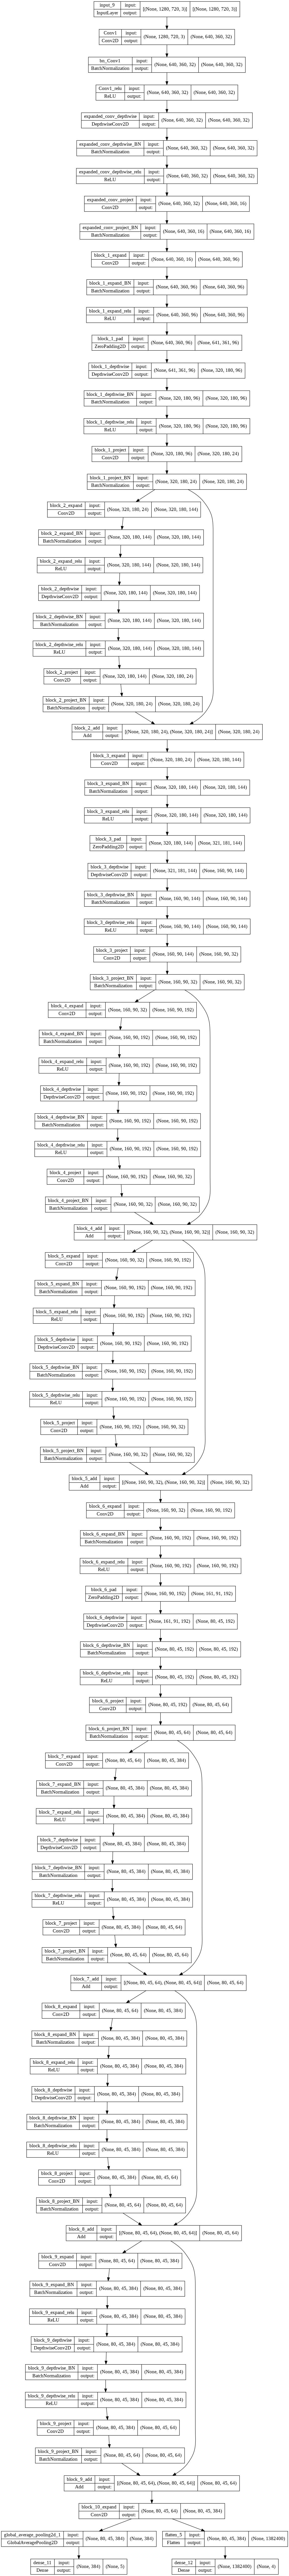

In [ ]:
MobileNet_layers = MobileNetV2(input_shape=(1280,720,3),include_top=False,weights='imagenet')
# MobileNet_layers.trainable = False

chopped_mobilenet = tf.keras.Model(inputs=[MobileNet_layers.input], outputs=[MobileNet_layers.layers[90].output])
classification_output = tf.keras.layers.GlobalAveragePooling2D()(chopped_mobilenet.output)
classification_output = tf.keras.layers.Dense(units=5, activation='sigmoid')(classification_output)
localization_output = tf.keras.layers.Flatten()(chopped_mobilenet.output)
localization_output = tf.keras.layers.Dense(units=4, activation='softmax')(localization_output)
model = tf.keras.Model(inputs=[chopped_mobilenet.input], outputs=[classification_output, localization_output])
# inputs = tf.keras.Input(shape = (1280,720,3))
# x = MobileNet_layers(inputs)
# x = tf.keras.layers.GlobalAveragePooling2D()(chopped_mobilenet.output)
# class_outputs = tf.keras.layers.Dense(5,activation='relu')(x)
# bbox_outputs = tf.keras.layers.Dense(4,activation='relu')(x)

# model = tf.keras.Model(inputs=chopped_mobilenet.input,outputs=(class_outputs,bbox_outputs),name='snack_model')
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(images,(class_,bbox), batch_size=10, epochs=100)

Epoch 1/100
6/6 [==============================] - 27s 4s/step - loss: 1841.3845 - dense_11_loss: 1.6287 - dense_12_loss: 1839.7557 - dense_11_accuracy: 0.1864 - dense_12_accuracy: 0.3390
Epoch 2/100
6/6 [==============================] - 23s 4s/step - loss: 1807.7806 - dense_11_loss: 1.6195 - dense_12_loss: 1806.1611 - dense_11_accuracy: 0.1695 - dense_12_accuracy: 0.4237
Epoch 3/100
6/6 [==============================] - 23s 4s/step - loss: 1290.1904 - dense_11_loss: 1.6202 - dense_12_loss: 1288.5703 - dense_11_accuracy: 0.1525 - dense_12_accuracy: 0.3051
Epoch 4/100
6/6 [==============================] - 23s 4s/step - loss: 1006.8015 - dense_11_loss: 1.6163 - dense_12_loss: 1005.1851 - dense_11_accuracy: 0.1525 - dense_12_accuracy: 0.2712
Epoch 5/100
6/6 [==============================] - 23s 4s/step - loss: 1928.0525 - dense_11_loss: 1.6121 - dense_12_loss: 1926.4404 - dense_11_accuracy: 0.1864 - dense_12_accuracy: 0.3559
Epoch 6/100
6/6 [==============================] - 23s 4s/st